# SNR (optimal) generation and comparison 

This notebook is full guide on how to use `gwsnr` package to generate 'optimal snr', 'matched filter snr' and 'probability of detection'. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from gwsnr import GWSNR

## Initialization

* run the following, if you want to see the documentation and the input parameters

In [2]:
# GWSNR?

* class initialization with default parameters
* IMPORTANT: set the npool parameter to the number of cores you want to use for the parallel processing
* parallel processing is use in the interpolator generation and in the SNR generation with inner-product method.

```
from gwsnr import GWSNR
gwsnr = GWSNR()
snr = gwsnr.snr(mass_1=30, mass_2=20, luminosity_distance=1000)
print(snr)
```


In [49]:
# gwsnr = GWSNR(gwsnr_verbose=False) # if you don't want to see the print statements
gwsnr = GWSNR()

# Below shows GWSNR initialization with all of it's arguments
# gwsnr = GWSNR(
#     npool=4,
#     mtot_min=2.0,
#     mtot_max=439.6,
#     ratio_min=0.1,
#     ratio_max=1.0,
#     mtot_resolution=500,
#     ratio_resolution=50,
#     sampling_frequency=2048.0,
#     waveform_approximant='IMRPhenomD',
#     minimum_frequency=20.0,
#     duration_max=None,
#     duration_min=None,
#     snr_type='interpolation',
#     psds={'L1':'aLIGO_O4_high_asd.txt','H1':'aLIGO_O4_high_asd.txt', 'V1':'AdV_asd.txt', 'K1':'KAGRA_design_asd.txt'},
#     ifos=['L1', 'H1', 'V1'],
#     interpolator_dir='./interpolator_pickle',
#     create_new_interpolator=False,
#     gwsnr_verbose=True,
#     multiprocessing_verbose=True,
#     mtot_cut=True,
#     pdet=False,
#     snr_th=8.0,
#     snr_th_net=8.0,
#     ann_path_dict=None,)

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_3.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_3.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_3.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_

## Calculate the SNR for given BBH (binary-black-hole) masses

* For a given set of parameters calculate SNR and compare between 'interpolation' and 'inner_product' method

In [4]:
mass_1 = np.array([5, 10.,50.,100.])
ratio = np.array([1, 0.8,0.5,0.2])
dl = 1000
print('Interpolation results: ')
print(gwsnr.snr(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=dl))
print('\n Inner product results: ')
print(gwsnr.compute_bilby_snr(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=dl))

Interpolation results: 
{'L1': array([ 7.40723723, 11.59750023, 31.03606512, 26.59902137]), 'H1': array([ 4.71123998,  7.37638139, 19.73993088, 16.91782903]), 'V1': array([2.22230615, 3.44041247, 9.33487066, 7.86143837]), 'optimal_snr_net': array([ 9.05547294, 14.16860798, 37.94788557, 32.48881484])}

 Inner product results: 


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.20it/s]

{'L1': array([ 7.40711467, 11.59746314, 31.03567109, 26.59869097]), 'H1': array([ 4.71116203,  7.37635779, 19.73968027, 16.91761888]), 'V1': array([2.22230551, 3.4404035 , 9.33473625, 7.86132463]), 'optimal_snr_net': array([ 9.05533197, 14.16856315, 37.94739989, 32.48840739])}


## Testing speed and accurarcy between the interpolation method and inner product method.

* set up the BBH parameters
* simulate 10000 events

In [45]:
# gerneral case, random parameters
# chirp mass can go upto only 95 if f_min=20. to get non zero SNR
nsamples = 10000
chirp_mass = np.linspace(5,60,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
param_dict = dict(
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5),
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5),
    total_mass = mass_1+mass_2,
    # Fix luminosity distance
    luminosity_distance = 500*np.ones(nsamples),
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(0,np.pi, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434*np.ones(nsamples),
    # spin zero
    a_1 = 0.0*np.ones(nsamples), 
    a_2 = 0.0*np.ones(nsamples), 
    tilt_1 = 0.0*np.ones(nsamples), 
    tilt_2 = 0.0*np.ones(nsamples), 
    phi_12 = 0.0*np.ones(nsamples), 
    phi_jl = 0.0*np.ones(nsamples),
)

* below calculation is with inner product method
* this is similar to how snr is calculated in the `bilby` package

In [50]:
# error might occur for mchirp>95., if f_min=20. 
start_time = datetime.now()
bilby_snr = gwsnr.compute_bilby_snr(gw_param_dict=param_dict)
end_time = datetime.now()
print('Duration inner-product: {}'.format(end_time - start_time))

100%|█████████████████████████████████████████████████████████| 9988/9988 [00:08<00:00, 1160.42it/s]


Duration inner-product: 0:00:08.736185


In [51]:
start_time = datetime.now()
interp_snr = gwsnr.snr(gw_param_dict=param_dict)
end_time = datetime.now()
print('Duration interpolation: {}'.format(end_time - start_time))

Duration interpolation: 0:00:00.142510


* interpolation method is much faster than inner product method
* **Note:** interpolation method is only for the spinless compact binary coalescence (CBC) frequency domain waveform models.

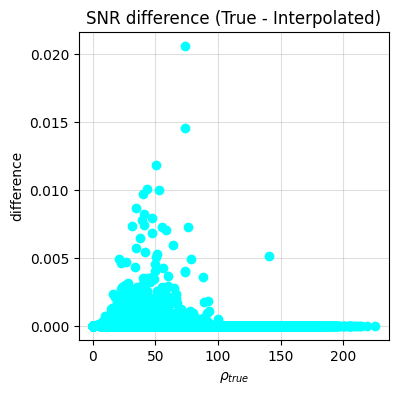

In [8]:
plt.figure(figsize=(4,4))
plt.plot(bilby_snr['optimal_snr_net'], abs(interp_snr['optimal_snr_net']-bilby_snr['optimal_snr_net']), 'o', color='cyan')
plt.xlabel(r"$\rho_{true}$")
plt.ylabel(r"difference")
plt.title(r"SNR difference (True - Interpolated)")
plt.grid(alpha=0.4)
plt.show()

## pdet (probaility of detection) calculation

In [9]:
mass_1 = np.array([2,50.,100.,])
ratio = 1.
dl = 500
snr_dict = gwsnr.snr(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=dl)
# with snr threshold equal to 8
pdet_dict = gwsnr.probability_of_detection(snr_dict, snr_th=8, snr_th_net=8, type='bool')

In [10]:
print('snr: ', snr_dict["optimal_snr_net"])
print('pdet: ', pdet_dict["pdet_net"])

snr:  [  8.78159001 105.15382713   0.        ]
pdet:  [1 1 0]


## Changing the input parameters 

What will change?
* Detectors: CE, ET.
* Minimum frequency: 10 Hz
* Maximum total mass: 500. Note that if this mass is above the allowed total mass for the given minimum frequency, i.e. the last stable orbit (LSO) frequency below the minimum frequency, then the maximum mass will be set to the maximum mass for the given minimum frequency.
* Waveform model: IMRPhenomXPHM
* multiprocessing_verbose: False, The progress bar won't be shown but the calculation will be faster.

In [11]:
# if snr_type = 'inner_product', interpolator will not be created
from gwsnr import GWSNR
gwsnr = GWSNR(
    npool = int(4), 
    mtot_min=2.,
    mtot_max=440.,  # highest total mass possible at 10Hz
    minimum_frequency = 10.,
    snr_type = 'inner_product', 
    #psds = {'CE':'CE_psd.txt', 'ET':'ET_B_psd.txt'}, # if you want to use your own psd
    ifos = ['CE', 'ET'],  # this will considet bilby's default psd of CE and ET
    multiprocessing_verbose=False,
)


Chosen GWSNR initialization parameters:

npool:  4
snr type:  inner_product
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  10.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=10.0): 369.97199706893525
detectors:  ['CE', 'ET1', 'ET2', 'ET3']
psds:  [PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/CE_psd.txt', asd_file='None'), PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/ET_D_psd.txt', asd_file='None'), PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/ET_D_psd.txt', asd_file='None'), PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/ET_D_psd.t

In [12]:
mass_1 = np.array([5, 10.,50.,100.])
ratio = np.array([1, 0.8,0.5,0.2])
gwsnr.snr(mass_1=mass_1, mass_2=mass_1*ratio)

solving SNR with inner product


{'CE': array([2148.90304551, 3418.3544206 , 9539.03962624, 9480.46037205]),
 'ET1': array([149.37771668, 236.23429377, 662.6230723 , 639.92876964]),
 'ET2': array([ 426.53991017,  674.55412147, 1892.0839869 , 1827.28164531]),
 'ET3': array([ 474.63277116,  750.61086744, 2105.4186128 , 2033.30973335]),
 'optimal_snr_net': array([2246.622034  , 3572.02932848, 9972.21718955, 9887.46400141])}

## SNR and Pdet with ANN (artificial neural network) model

* **Note:** as of 2024-02-16, the ANN model is only available for the IMRPhenomXPHM waveform model. This pre-trained model considers the spin precession of the compact objects. SNR with ANN is much faster than 'inner_product' method. The ANN model is trained with the data generated using `ler` package. The corresponding Pdet generated is more accurate (accuracy>99%) than it's absolute SNR. So users are advised to use the ANN model for Pdet calculation rather than SNR calculation.
  
* Users can train their own ANN model with the instructions in the documentation.

In [74]:
import numpy as np
from gwsnr import GWSNR

In [75]:
# innitialize the class for pdet calculation
gwsnr = GWSNR(snr_type='ann', waveform_approximant='IMRPhenomXPHM', pdet=True)

psds not given. Choosing bilby's default psds
Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_4.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_4.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_4.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4

* compare pdet (bool)

In [76]:
nsamples = 10000
chirp_mass = np.linspace(5,60,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
param_dict = dict(
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5),
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5),
    # Fix luminosity distance
    luminosity_distance = 500*np.ones(nsamples),
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(0,np.pi, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434*np.ones(nsamples),
    # spin zero
    a_1 = 0.0*np.ones(nsamples), 
    a_2 = 0.0*np.ones(nsamples), 
    tilt_1 = 0.0*np.ones(nsamples), 
    tilt_2 = 0.0*np.ones(nsamples), 
    phi_12 = 0.0*np.ones(nsamples), 
    phi_jl = 0.0*np.ones(nsamples),
)

In [77]:
# set the GW parameters
mass_1 = np.array([5, 10.,50.,200.])
ratio = np.array([1, 0.8,0.5,0.2])
param_dict = dict(
    mass_1 = mass_1,
    mass_2 = mass_1*ratio,
    luminosity_distance = np.array([1000, 2000, 3000, 4000]),
    theta_jn = np.array([0.1, 0.2, 0.3, 0.4]),
    ra = np.array([0.1, 0.2, 0.3, 0.4]), 
    dec = np.array([0.1, 0.2, 0.3, 0.4]), 
    psi = np.array([0.1, 0.2, 0.3, 0.4]),
    a_1 = np.array([0.1, 0.2, 0.3, 0.4]),
    a_2 = np.array([0.1, 0.2, 0.3, 0.4]),
    tilt_1 = np.array([0.1, 0.2, 0.3, 0.4]),
    tilt_2 = np.array([0.1, 0.2, 0.3, 0.4]),
    phi_12 = np.array([0.1, 0.2, 0.3, 0.4]),
    phi_jl = np.array([0.1, 0.2, 0.3, 0.4]),
    geocent_time = np.array([0.0, 0.0, 0.0, 0.0]),
    phase = np.array([0.0, 0.0, 0.0, 0.0]),
)

# pdet calculation with ANN
pdet_ann = gwsnr.snr(gw_param_dict=param_dict)
print(f'Probability of detection (with ANN): \n{pdet_ann}')

Probability of detection (with ANN): 
{'L1': array([0, 0, 1, 0]), 'H1': array([0, 0, 1, 0]), 'V1': array([0, 0, 0, 0]), 'pdet_net': array([1, 1, 1, 0])}


In [78]:
# pdet calculation with inner product
snr_bilby = gwsnr.compute_bilby_snr(gw_param_dict=param_dict)

# pdet calculation with inner product
pdet_bilby = gwsnr.probability_of_detection(snr_dict=snr_bilby, type='bool')
print(f'Probability of detection (with inner product SNR): \n{pdet_bilby}')

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]

Probability of detection (with inner product SNR): 
{'L1': array([1, 0, 1, 0]), 'H1': array([0, 0, 1, 0]), 'V1': array([0, 0, 0, 0]), 'pdet_net': array([1, 1, 1, 0])}


* compare the SNRs

In [80]:
# looking at the SNRs 
snr_ann = gwsnr.snr_with_ann(
    mass_1 = mass_1,
    mass_2 = mass_1*ratio,
    luminosity_distance = np.array([1000, 2000, 3000, 4000]),
    theta_jn = np.array([0.1, 0.2, 0.3, 0.4]),
    ra = np.array([0.1, 0.2, 0.3, 0.4]), 
    dec = np.array([0.1, 0.2, 0.3, 0.4]), 
    psi = np.array([0.1, 0.2, 0.3, 0.4]),
    a_1 = np.array([0.1, 0.2, 0.3, 0.4]),
    a_2 = np.array([0.1, 0.2, 0.3, 0.4]),
    tilt_1 = np.array([0.1, 0.2, 0.3, 0.4]),
    tilt_2 = np.array([0.1, 0.2, 0.3, 0.4]),
    phi_12 = np.array([0.1, 0.2, 0.3, 0.4]),
    phi_jl = np.array([0.1, 0.2, 0.3, 0.4]),
    geocent_time = np.array([0.0, 0.0, 0.0, 0.0]),
    phase = np.array([0.0, 0.0, 0.0, 0.0]),
)
print("SNR ANN : ", snr_ann["optimal_snr_net"])

# looking at the inner product SNRs
print("SNR inner product : ", snr_bilby["optimal_snr_net"])

SNR ANN :  [10.35015907  8.66277382 17.4468187   0.        ]
SNR inner product :  [11.41883925  9.31868266 17.87350892  0.        ]


* For comparision, let's have look at the interpolated spinless SNRs with IMRPhenomXPHM.

In [82]:
snr_interp = gwsnr.snr_with_interpolation(
    mass_1 = mass_1,
    mass_2 = mass_1*ratio,
    luminosity_distance = np.array([1000, 2000, 3000, 4000]),
    theta_jn = np.array([0.1, 0.2, 0.3, 0.4]),
    ra = np.array([0.1, 0.2, 0.3, 0.4]), 
    dec = np.array([0.1, 0.2, 0.3, 0.4]), 
    psi = np.array([0.1, 0.2, 0.3, 0.4]),
    geocent_time = np.array([0.0, 0.0, 0.0, 0.0]),
    phase = np.array([0.0, 0.0, 0.0, 0.0]),
)
print("SNR with interpolation =", snr_interp["optimal_snr_net"])
# effective spin
chi_eff = (mass_1 * a_1 * np.cos(tilt_1) + mass_2 * a_2 * np.cos(tilt_2)) / (mass_1 + mass_2)
print(f'effective spin : {chi_eff}')

SNR with interpolation = [11.33690677  9.10055852 16.50568851  0.        ]
effective spin : [0.09950042 0.19601332 0.28660095 0.3684244 ]


* spinless SNRs with IMRPhenomXPHM is more accurate when spin is small.

* **Note:** ANN is less accurate in low mass ratio region. The accuracy can be improved by increasing the number of training samples in the sparse region of the parameter space.

## Inner product assisted with JAX 

*  `ripple` is used to generate the waveform
   *  `ripple` available waveform : IMRPhenomXAS, IMRPhenomD (aligned spin), TaylorF2 with tidal effects, IMRPhenomD_NRTidalv2
*  It is further assisted with jax.jit+jax.vmap

In [92]:
import numpy as np
from gwsnr import GWSNR
# innitialize the class for pdet calculation
gwsnr = GWSNR(snr_type='inner_product_jax', waveform_approximant='IMRPhenomXAS', multiprocessing_verbose=False)

psds not given. Choosing bilby's default psds

Chosen GWSNR initialization parameters:

npool:  4
snr type:  inner_product_jax
waveform approximant:  IMRPhenomXAS
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ripple1/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/AdV_asd.txt')]


In [94]:
# jax.jit functions are slow when run for the first time
snr_jax = gwsnr.snr(gw_param_dict=param_dict)
print("SNR (inner product JAX assisted) : ", snr_jax["optimal_snr_net"])

solving SNR with inner product JAX
SNR (inner product JAX assisted) :  [11.35195744  9.22144833 17.4977703   0.        ]
